In [1]:
! pip install imblearn --user

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
smote = SMOTE()
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.tree import plot_tree

In [5]:
berka = pd.read_csv("C:/Users/niafrate/OneDrive - Ryerson University/CIND820/berka_cleaned.csv")

In [6]:
berka.head(5)

,amount,duration,payments,frequency,date_diff,card_type,no_orders,avg_order,avg_trans,avg_bal,no_of_trans,total_inhabitants,avg_unemp_rt,avg_crime_rt,avg_salary,age_at_loan,gender,same_district,loan_status
0,252060,60,4201,0.820475,232,0.753709,3,4194.73,6998.75,34002.08,444,1204953,0.36,0.077,12541,29,1,0,1
1,316140,60,5269,0.820475,683,0.753709,1,5269.00,3866.65,9629.35,414,1204953,0.36,0.077,12541,23,0,1,1
2,320976,48,6687,0.820475,251,0.194362,1,6687.00,13399.67,47205.48,301,1204953,0.36,0.077,12541,56,0,1,1
3,270648,36,7518,0.133531,307,0.753709,1,7518.00,7433.61,44437.71,408,1204953,0.36,0.077,12541,53,0,1,1
4,215388,36,5983,0.820475,156,0.753709,1,5983.00,7253.25,35553.19,399,1204953,0.36,0.077,12541,30,0,0,1


In [8]:
berka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount             674 non-null    int64  
 1   duration           674 non-null    int64  
 2   payments           674 non-null    int64  
 3   frequency          674 non-null    float64
 4   date_diff          674 non-null    int64  
 5   card_type          674 non-null    float64
 6   no_orders          674 non-null    int64  
 7   avg_order          674 non-null    float64
 8   avg_trans          674 non-null    float64
 9   avg_bal            674 non-null    float64
 10  no_of_trans        674 non-null    int64  
 11  total_inhabitants  674 non-null    int64  
 12  avg_unemp_rt       674 non-null    float64
 13  avg_crime_rt       674 non-null    float64
 14  avg_salary         674 non-null    int64  
 15  age_at_loan        674 non-null    int64  
 16  gender             674 non

In [9]:
X = berka.iloc[:,:-1]
y = berka['loan_status']
print(X)

     amount  duration  payments  frequency  date_diff  card_type  no_orders  \
0    252060        60      4201   0.820475        232   0.753709          3   
1    316140        60      5269   0.820475        683   0.753709          1   
2    320976        48      6687   0.820475        251   0.194362          1   
3    270648        36      7518   0.133531        307   0.753709          1   
4    215388        36      5983   0.820475        156   0.753709          1   
..      ...       ...       ...        ...        ...        ...        ...   
669   73056        48      1522   0.820475        290   0.753709          3   
670  253560        60      4226   0.820475        645   0.753709          1   
671   73836        36      2051   0.820475        188   0.194362          3   
672   91200        24      3800   0.820475        231   0.753709          2   
673  123408        24      5142   0.045994        384   0.022255          5   

     avg_order  avg_trans   avg_bal  no_of_trans  t

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 94)
X_train.shape

(539, 18)

In [11]:
berka_DT = DecisionTreeClassifier(max_leaf_nodes=8, class_weight='balanced')
berka_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_leaf_nodes=8)

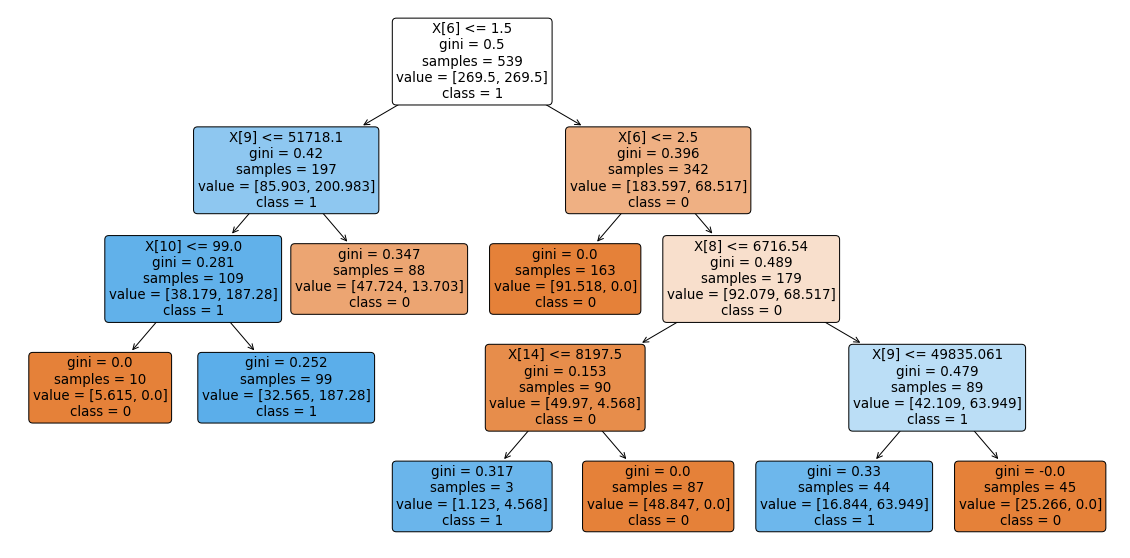

In [13]:
plt.figure(figsize=(20,10))

plot_tree(berka_DT,
         class_names = ["0","1"],
         rounded = True,
         filled = True)

plt.show()

In [17]:
y_predict = berka_DT.predict(X_test)


In [18]:
pd.crosstab(y_test,y_predict)

col_0,0,1
loan_status,,
0,108,12
1,5,10


In [19]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       120
           1       0.45      0.67      0.54        15

    accuracy                           0.87       135
   macro avg       0.71      0.78      0.73       135
weighted avg       0.90      0.87      0.88       135



In [20]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [21]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 480, 1: 59})
After SMOTE : Counter({0: 480, 1: 480})


In [28]:
berka_DT_smote = DecisionTreeClassifier(max_leaf_nodes=8)
berka_DT_smote.fit(X_train_smote, y_train_smote)




DecisionTreeClassifier(max_leaf_nodes=8)

In [29]:
y_predict_smote = berka_DT_smote.predict(X_test)

In [30]:
pd.crosstab(y_test,y_predict_smote)

col_0,0,1
loan_status,,
0,114,6
1,6,9


In [31]:
print(classification_report(y_test, y_predict_smote))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       120
           1       0.60      0.60      0.60        15

    accuracy                           0.91       135
   macro avg       0.77      0.77      0.78       135
weighted avg       0.91      0.91      0.91       135

